In [74]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
from scipy.interpolate import RectBivariateSpline
from scipy.ndimage.filters import gaussian_filter

import time

In [4]:
fn = "pr_19510101-19551231.pickle"
# im = pkl.load("pr_19510101-19551231.pickle")
with open(fn, 'rb') as f:
    all_data = pkl.load(f)

# Preprocess all data in loaded file

In [78]:
# Blur images
sigma = 0.55
tic = time.time()
blurred = gaussian_filter(all_data, sigma)
toc = time.time()
print("Time taken to blur: ", toc-tic)


# Subsample
tic = time.time()
half_res = blurred[:, ::2, ::2]
fourth_res = blurred[:, ::4, ::4]
eighth_res = blurred[:, ::8, ::8]
toc = time.time()
print("Time taken to subsample: ", toc-tic)

Time taken to blur:  36.65585207939148
Time taken to subsample:  0.004652976989746094


In [77]:
# Interpolate
n = all_data.shape[0]

tic = time.time()
h2, w2 = half_res.shape[1:3]
x = np.arange(h2)
y = np.arange(w2)
xnew = np.arange(0, h2, h2/h)
ynew = np.arange(0, w2, w2/w)
half_res_interp = np.zeros_like(all_data)
for i in range(n):
    f = RectBivariateSpline(x, y, half_res[i, :, :])
    half_res_interp[i, :, :] = f(xnew, ynew)
    
toc = time.time()
print("Time taken to interpolate half res: ", toc-tic)

Time taken to interpolate half res:  31.961257934570312


In [79]:
tic = time.time()
h4, w4 = fourth_res.shape[1:3]
x = np.arange(h4)
y = np.arange(w4)
xnew = np.arange(0, h4, h4/h)
ynew = np.arange(0, w4, w4/w)
fourth_res_interp = np.zeros_like(all_data)
for i in range(n):
    f = RectBivariateSpline(x, y, fourth_res[i, :, :])
    fourth_res_interp[i, :, :] = f(xnew, ynew)
    
toc = time.time()
print("Time taken to interpolate fourth res: ", toc-tic)

Time taken to interpolate fourth res:  22.767451763153076


In [80]:
tic = time.time()
h8, w8 = eighth_res.shape[1:3]
x = np.arange(h8)
y = np.arange(w8)
xnew = np.arange(0, h8, h8/h)
ynew = np.arange(0, w8, w8/w)
eighth_res_interp = np.zeros_like(all_data)
for i in range(n):
    f = RectBivariateSpline(x, y, eighth_res[i, :, :])
    eighth_res_interp[i, :, :] = f(xnew, ynew)
    
toc = time.time()
print("Time taken to interpolate eighth res: ", toc-tic)

Time taken to interpolate eighth res:  23.412299871444702


# Proof of concept code for single image

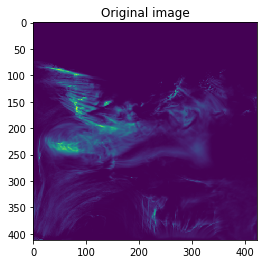

In [14]:
# for i in range(20):
#     plt.figure()
#     plt.imshow(all_data[i, :, :])
#     plt.title(str(i))
#     plt.show()
    
# Choose the index 4th image
im = all_data[4, :, :]
plt.imshow(im)
plt.title("Original image")
plt.show()

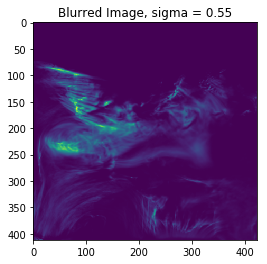

In [68]:
# Blur it
sigma = .55
im_blur = gaussian_filter(im, sigma=sigma)
plt.imshow(im_blur)
plt.title("Blurred Image, sigma = "+str(sigma))
plt.show()

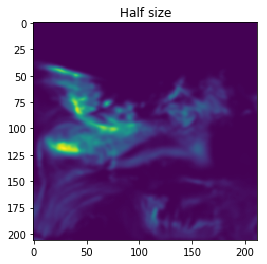

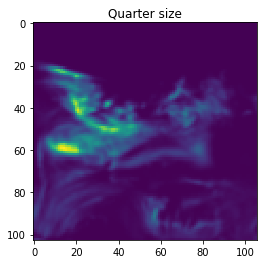

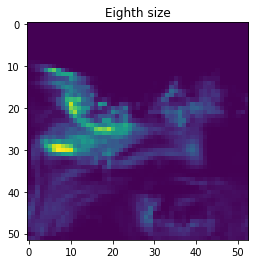

In [31]:
# Cut it into 1/2, 1/4, and 1/8th
h, w = im_blur.shape
im_2 = im_blur[::2, ::2]
plt.imshow(im_2)
plt.title("Half size")
plt.show()

im_4 = im_2[::2, ::2]
plt.figure()
plt.imshow(im_4)
plt.title("Quarter size")
plt.show()

im_8 = im_4[::2, ::2]
plt.figure()
plt.imshow(im_8)
plt.title("Eighth size")
plt.show()

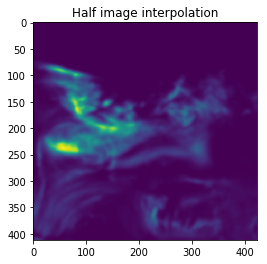

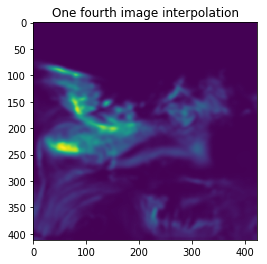

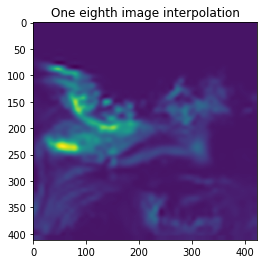

In [53]:
# Interpolate them back up to original size
h2, w2 = im_2.shape
x = np.arange(h2)
y = np.arange(w2)
f = RectBivariateSpline(x, y, im_2)

xnew = np.arange(0, h2, h2/h)
ynew = np.arange(0, w2, w2/w)
im2_interp = f(xnew, ynew)
plt.figure()
plt.imshow(im2_interp)
plt.title("Half image interpolation")
plt.show()


h4, w4 = im_4.shape
x = np.arange(h4)
y = np.arange(w4)
f = RectBivariateSpline(x, y, im_4)

xnew = np.arange(0, h4, h4/h)
ynew = np.arange(0, w4, w4/w)
im4_interp = f(xnew, ynew)
plt.figure()
plt.imshow(im4_interp)
plt.title("One fourth image interpolation")
plt.show()


h8, w8 = im_8.shape
x = np.arange(h8)
y = np.arange(w8)
f = RectBivariateSpline(x, y, im_8)

xnew = np.arange(0, h8, h8/h)
ynew = np.arange(0, w8, w8/w)
im8_interp = f(xnew, ynew)
plt.figure()
plt.imshow(im8_interp)
plt.title("One eighth image interpolation")
plt.show()
